In [1]:
print("hi")

hi


In [24]:
from langgraph.graph import StateGraph, START, END


In [12]:
from typing import TypedDict


In [ ]:
class BMIstate(TypedDict):
    weight_kg:float
    height_m:float
    category:str
    bmi:float

In [47]:
def calculate_bmi(state: BMIstate)->BMIstate:
    weight=state['weight_kg']
    height=state['height_m']
    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state

In [48]:
def label_bmi(state:BMIstate)->BMIstate:
    bmi=state['bmi']
    if bmi<18.5:
        state['category']="underweight"
    elif 18.5<bmi<25:
        state['category']="normal"
    elif 25<bmi<30:
        state['category']="fat"
    else:
        state["category"]="overweight"
    return state

In [49]:
graph=StateGraph(BMIstate)
graph.add_node("calculate bmi",calculate_bmi)
graph.add_node("label_bmi",label_bmi)
graph.add_edge(START,"calculate bmi")
graph.add_edge("calculate bmi","label_bmi")
graph.add_edge("label_bmi",END)

In [50]:
workflow = graph.compile()


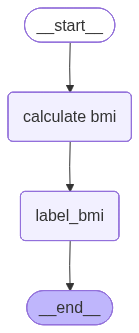

In [51]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [52]:
initial_state={"weight_kg":78,"height_m":1.55}
final=workflow.invoke(initial_state)
print(final)

{'weight_kg': 78, 'height_m': 1.55, 'category': 'overweight', 'bmi': 32.47}
